## 1. Importing required libraries & data source

In [ ]:
# mount google drive
from google.colab import files, drive

drive.mount('/gdrive')

# read the required file
val_set='/gdrive/My Drive/Survival_Analysis/Customer_Attrition_Telecom.csv'

Mounted at /gdrive


In [ ]:
# install library
# library to model the KM estimator
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 12.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=cd397b1cb7c74c7fd8dd69d7a7c3ba26d7e70ce7988bdb3a346e5218c0a1207a
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lifelines

dataset_churn = pd.read_csv(val_set)
dataset_churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Preliminary checks & eyeballing loaded dataframe
1. Number of rows & columns present
2. Data Type of each field/variable
3. Presence of null values of each field/variable
4. Frequency of unique values of each field/variable

In [ ]:
# number of rows & columns loaded to dataframe
dataset_churn.shape

(7043, 21)

In [ ]:
# check data types of the the fields
print("Data Types of DataFrame Fields:")
print(dataset_churn.dtypes)

Data Types of DataFrame Fields:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [ ]:
# Check for null values in all fields
null_values = dataset_churn.isnull().any()

# Display the result
print("Presence of Null Values in DataFrame Fields:")
print(null_values)

# The output will indicate True for fields that contain at least one null value and False for fields without null values.

Presence of Null Values in DataFrame Fields:
customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


In [ ]:
# Frequency of unique values

# Check the number of distinct values in each field
distinct_values = dataset_churn.nunique()

# Display the result
print("Number of Distinct Values in DataFrame Fields:")
print(distinct_values)

Number of Distinct Values in DataFrame Fields:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [ ]:
dataset_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# view distribution of churn event
dataset_churn.Churn = labelencoder.fit_transform(dataset_churn.Churn)
dataset_churn.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

## 3. Feature update

In [ ]:
# 1. churn - identifying which customer has left the organization?
# 2. tenure - for how long has the customer been with the organization?

# convert 'tenure' column to a float data type, to handle missing values, ensure compatibility with mathematical operations and facilitating data transformations
dataset_churn['tenure'] = dataset_churn['tenure'].astype(float)

# update 'Churn' column in the original DataFrame with the boolean values, so that 'Churn' column is a boolean column, where True represents 'Yes' and False represents
# anything other than 'Yes'. This is done to prepare the target variable for ML models, as boolean values are easier to work with than string labels.
dataset_churn['Churn'] = dataset_churn['Churn'] == 'Yes' # creating a mask that indicates which rows have 'Yes' in the 'Churn' column
dataset_churn.head()

# in the following records, there are many customers which haven't churned yet, hence this scenario highlights that we'll need to consider censorship scenario.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,False
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True


## 4. EDA (Exploratory Data Analysis)
### Kaplan–Meier (KM) Estimator
- In Parametric approaches we can assume one mathematical form of the
distribution and try to fit that into the dataset. Here the advantage is that the formulae of the density and distribution function is known and the maximum
likelihood estimation (MLE) will guide in finding optimal values of parameters.

- Non-parametric models are known to be distribution-free. Any mathematical formulae for the probability density cannot be assumed.
Probability computation must be done intuitively. Kaplan–Meier estimator
is one of the most widely used non-parametric techniques for modeling survival
distributions.
> - Due to its discrete nature, KM estimate curves always produce step-wise gradient.

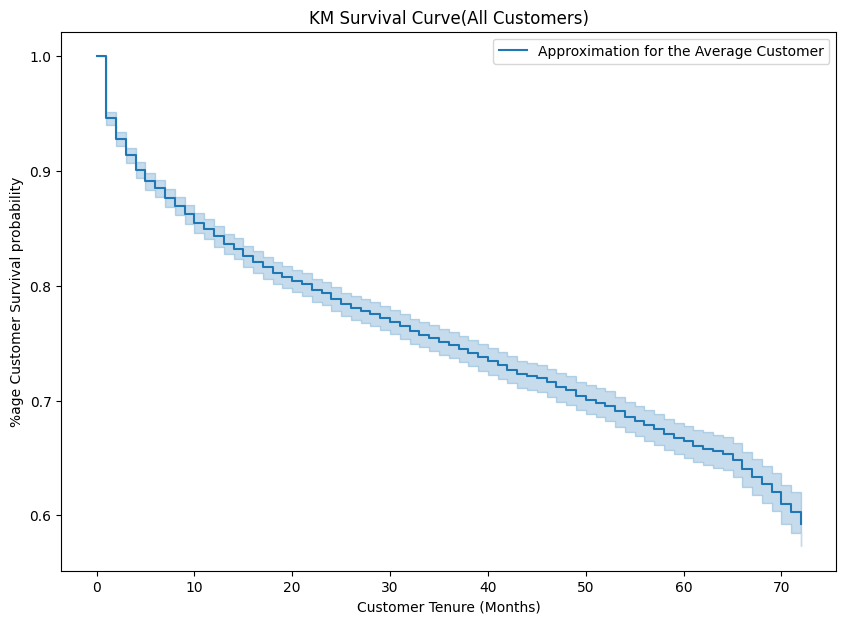

In [ ]:
# fitting kmf to churn data
tenure_data = dataset_churn['tenure'].values
churn_values = dataset_churn['Churn'].values
kmf = lifelines.KaplanMeierFitter()
kmf.fit(tenure_data, event_observed=churn_values, label='Approximation for the Average Customer')

# plotting kmf curve
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('KM Survival Curve(All Customers)')
ax.set_xlabel('Customer Tenure (Months)')
ax.set_ylabel('%age Customer Survival probability')
plt.show()

The above survival curve is cumulative.

Data insights:
1. Even after 70 months, the organization is able to retain 60% of its customers
2. After 20 months, the chance of a customer not canceling service is just above 80%
3. Sudden drop in the starting months indicates that during early tenure or after one tenure only customers start churning rapidly and after that churn rate decreases.

Next: examine the effect of different variables on the survival rate.
Approach of modeling survival distributions with explanatory factors - using Proportional Hazard (PH) Model.
- PH model makes assumptions about the time scale, but with respect to hazard only. It says hazard is affected by the covariates, which may increase or decrease the chances of survival.
In this case study there are several variables/features present which are type of hazard (MultipleLines, InternetService, Contract etc).

## 5. Preprocessing steps to prepare dataset for ML

In [ ]:
# When performing OHE (one-hot encoding) on categorical variables, it's required to use k-1 binary columns (dummy variables) to represent k categories.
# This is done to avoid multicollinearity - encoding categorical variables (k-1 dummies)
features_to_drop = ['customerID', 'gender', 'PhoneService', 'InternetService']

# Transforming numeric columns for PH estimation
churn_hazard = dataset_churn.drop(features_to_drop, axis=1).copy()

# Transform fields to integers
churn_hazard['TotalCharges'] = pd.to_numeric(churn_hazard['TotalCharges'], errors='coerce')
churn_hazard['TotalCharges'].fillna(0, inplace=True)

# Combine all fields encoded as 'Yes'/'No'
binary_features = ['Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'PaperlessBilling']
for item in binary_features:
    churn_hazard[item] = churn_hazard[item] == 'Yes'

# OHE - the remaining categorical features
ohe_feature = ['MultipleLines', 'Contract', 'PaymentMethod']
churn_hazard = pd.get_dummies(churn_hazard, drop_first=True, columns=ohe_feature)

In [ ]:
churn_hazard.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,True,False,1,False,True,False,False,False,False,...,29.85,29.85,0,1,0,0,0,0,1,0
1,0,False,False,34,True,False,True,False,False,False,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,False,False,2,True,True,False,False,False,False,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,False,False,45,True,False,True,True,False,False,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,False,False,2,False,False,False,False,False,False,...,70.70,151.65,1,0,0,0,0,0,1,0


## 6. Creating a Cox-PH Model

In [ ]:
# Fitting survival regression model
# CoxPH model for analyzing the relationship between the time until an event (survival time) and predictor variables.
cph = lifelines.CoxPHFitter()
cph.fit(churn_hazard, duration_col='tenure', event_col='Churn', show_progress=False)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -12688.70
         time fit was run = 2023-11-29 21:11:00 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
SeniorCitizen                           0.03       1.03       0.06            -0.08             0.14                 0.93                 1.16
Partner                                -0.19       0.82       0.06            -0.30            -0.09                 0.74                 0.92
Dependents                             -0.10       0.91       0.07            -0.23             0.04                 0.79                 1.04
OnlineSecurity                         -0.38       0.68       0.07            -0.51            -0.25                 0.60                 0.78
OnlineBackup                           -0.29       0.75       0.06            -0.40            -0.18                 0.67                 0.83
DeviceProtection                       -0.16       0.85       0.06            -0.27            -0.05                 0.76                 0.95
TechSupport                            -0.28       0.76       0.07            -0.41            -0.15                 0.67                 0.86
StreamingTV                            -0.27       0.77       0.06            -0.38            -0.15                 0.68                 0.86
StreamingMovies                        -0.26       0.77       0.06            -0.38            -0.14                 0.69                 0.87
PaperlessBilling                        0.16       1.17       0.06             0.05             0.27                 1.05                 1.31
MonthlyCharges                          0.07       1.07       0.00             0.06             0.07                 1.06                 1.07
TotalCharges                           -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
MultipleLines_No phone service          0.64       1.89       0.12             0.41             0.87                 1.51                 2.38
MultipleLines_Yes                      -0.20       0.82       0.05            -0.30            -0.09                 0.74                 0.91
Contract_One year                      -1.40       0.25       0.10            -1.60            -1.20                 0.20                 0.30
Contract_Two year                      -4.05       0.02       0.20            -4.43            -3.66                 0.01                 0.03
PaymentMethod_Credit card (automatic)  -0.01       0.99       0.09            -0.18             0.17                 0.83                 1.19
PaymentMethod_Electronic check          0.38       1.46       0.07             0.24             0.52                 1.27                 1.69
PaymentMethod_Mailed check              0.52       1.68       0.09             0.35             0.69                 1.42                 1.99

                                        cmp to      z      p   -log2(p)
covariate                                                              
SeniorCitizen                             0.00   0.60   0.55       0.87
Partner                                   0.00  -3.52 <0.005      11.20
Dependents                                0.00  -1.39   0.17       2.60
OnlineSecurity                            0.00  -5.65 <0.005      25.89
OnlineBackup                              0.00  -5.22 <0.005      22.41
DeviceProtection                          0.00  -2.85 <0.005       7.85
TechSupport                               0.00  -4.19 <

## How to interpret the results from the above output?

Cox-PH model is used to analyze the relationship between predictor variables and the hazard of Churn.
- The concordance index, log-likelihood ratio test, and AIC provide insights into the model's performance and fit.
- The coefficients and hazard ratios help interpret the impact of each predictor on the hazard of Churn.

1. coef: The coefficients of the model, indicating the direction and strength of the relationship with the hazard.  
> - Predictor variables with positive coefficients (coef) have a positive impact on the hazard of Churn, and those with negative coefficients have a negative impact.
2. exp(coef): The exponential of the coefficients, which represents the hazard ratio. It indicates the factor by which the hazard increases (or decreases) for a one-unit change in the predictor variable.
> - Hazard ratios (exp(coef)) indicate the multiplicative effect on the hazard for a one-unit change in the predictor.
3. se(coef): Standard errors of the coefficients.
4. [coef lower 95%, coef upper 95%]: 95% confidence intervals for the coefficients.
5. p: P-values associated with each coefficient. Small p-values suggest that the corresponding variable is statistically significant.
> - Most important covariate will have the lowest p-value.  
> - A low p-value (<0.005) points to highly significant covariate.  
6. log-likelihood: The log-likelihood of the model.
7. Model Fit Information:
> - Partial Log-Likelihood: -12688.70 is the partial log-likelihood of the fitted model.
> - Time Fit Was Run: 2023-11-29 01:04:16 UTC specifies the date and time when the model was fitted.
8. Concordance and AIC:
> - Concordance: 0.93 is the concordance index, indicating how well the model discriminates between subjects with different survival times.
> - Partial AIC: 25415.41 is the Partial Akaike Information Criterion (AIC), a measure of model fit.
9. Log-Likelihood Ratio Test:
> - log-likelihood ratio test: 5928.67 on 19 df is the result of a log-likelihood ratio test comparing the fitted model to the null model (no predictors).
> -log2(p) of ll-ratio test: inf is the negative log base 2 of the p-value for the log-likelihood ratio test.


- In the above regression, the key output is exp(coef). This is interpreted as the scaling of hazard risk for each additional unit of the variable, 1.00 being neutral.
- For example, exp(coef), corresponding to PaymentMethod_Mailed check = 1.68, means that a customer who pays by mailing a check is 1.68 times as likely to churn.
- Variables having exp(coef) below 1.0 is good, meaning a customer is less likely to churn.
- To better visualize the above, we can plot the coefficient outputs and their confidence intervals.

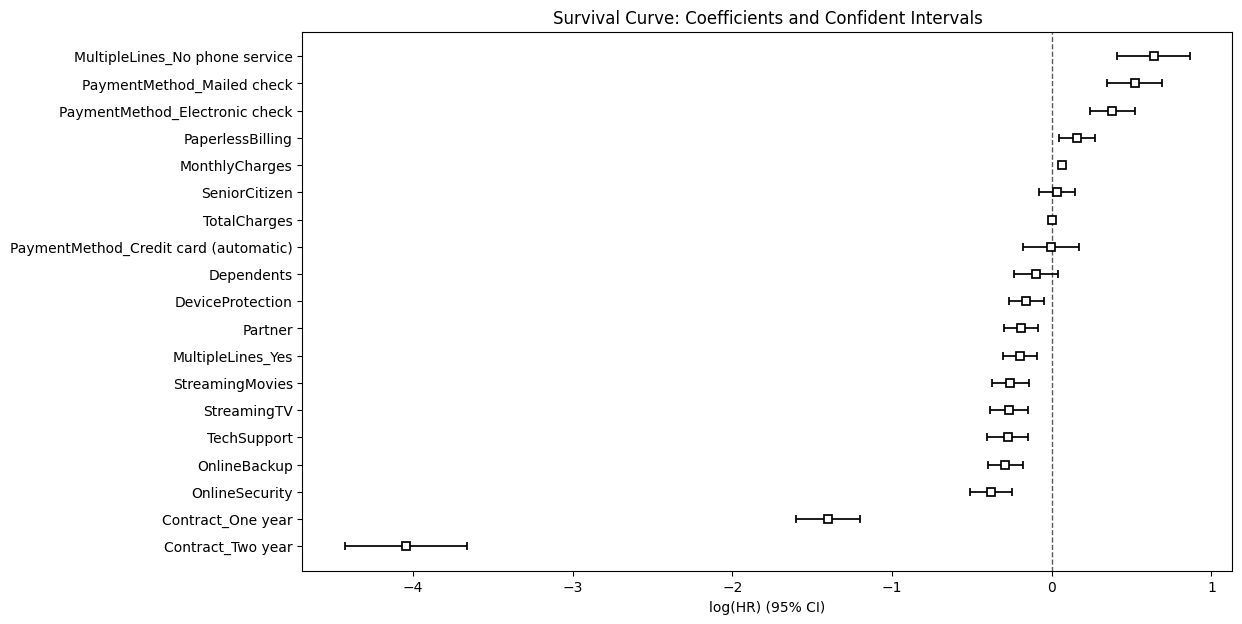

In [ ]:
# plotting coefficients
fig_coef, ax_coef = plt.subplots(figsize=(12,7))
ax_coef.set_title('Survival Curve: Coefficients and Confident Intervals')
cph.plot(ax=ax_coef);

In [ ]:
# function for creating Kaplan-Meier curve plots segmented
# by categorical variables
def plot_categorical_survival(feature, t='tenure', event='Churn', df=dataset_churn, ax=None):
    for item in df[feature].unique():
        dfu = df[feature] == item
        kmf = lifelines.KaplanMeierFitter()
        kmf.fit(df[dfu][t], event_observed=df[dfu][event], label=item)
        kmf.plot(ax=ax, label=item)

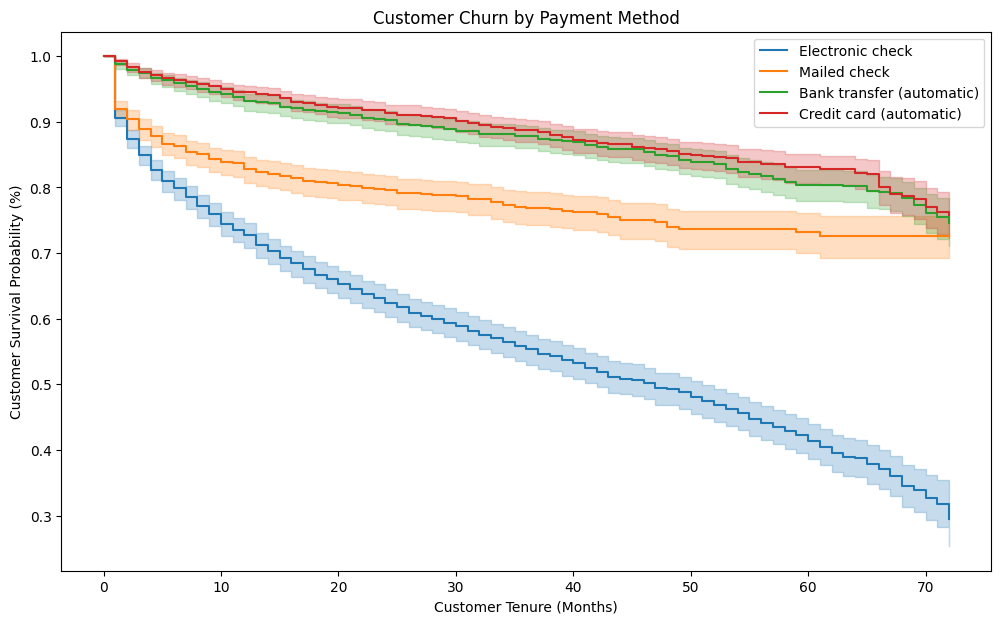

In [ ]:
fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='PaymentMethod', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by Payment Method')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Probability (%)')
plt.show()

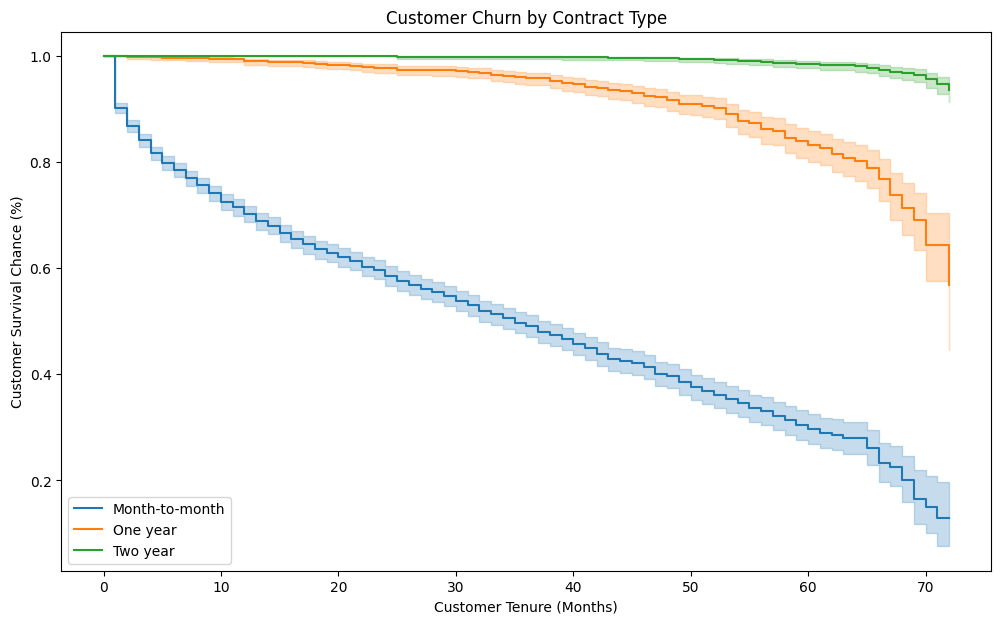

In [ ]:
fig_contract, ax_contract = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='Contract', ax=ax_contract)
ax_contract.set_title('Customer Churn by Contract Type')
ax_contract.set_xlabel('Customer Tenure (Months)')
ax_contract.set_ylabel('Customer Survival Chance (%)')
plt.show()

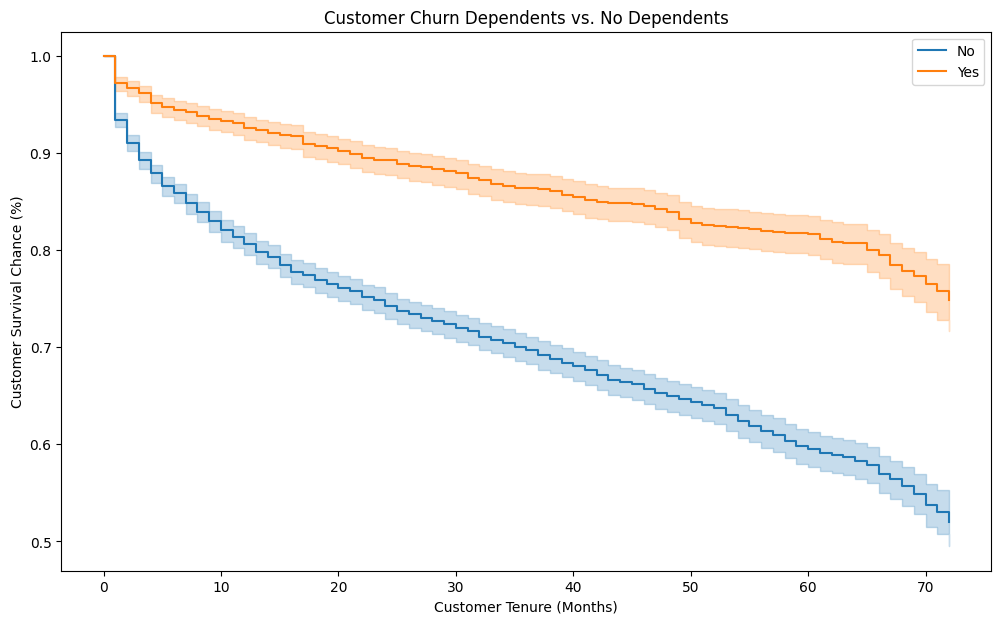

In [ ]:
fig_dep, ax_dep = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='Dependents', ax=ax_dep)
ax_dep.set_title('Customer Churn Dependents vs. No Dependents')
ax_dep.set_xlabel('Customer Tenure (Months)')
ax_dep.set_ylabel('Customer Survival Chance (%)')
plt.show()

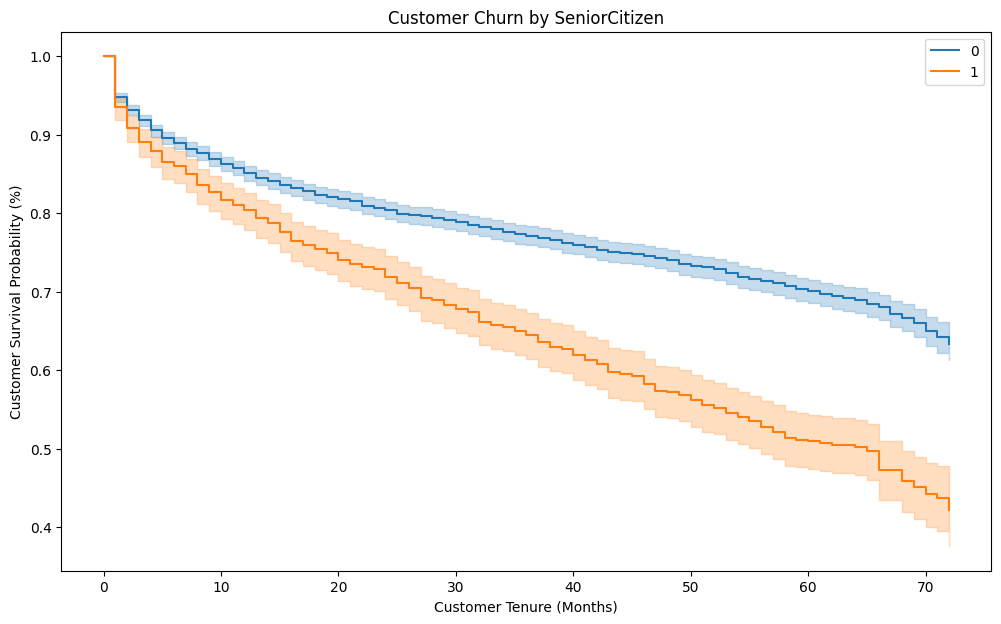

In [ ]:
#SeniorCitizen

fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='SeniorCitizen', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by SeniorCitizen')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Probability (%)')
plt.show()

#0 = Not a SeniorCitizen
#1 = Is a SeniorCitizen

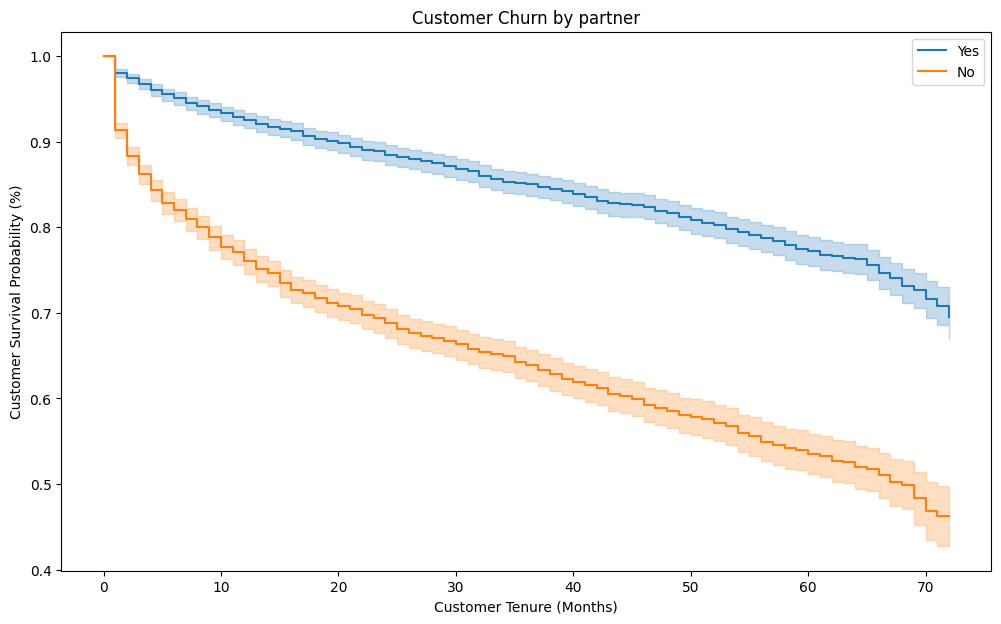

In [ ]:
#Partner

fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='Partner', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by Partner')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Probability (%)')
plt.show()

#Yes = has Partner
#No = Does not have Partner

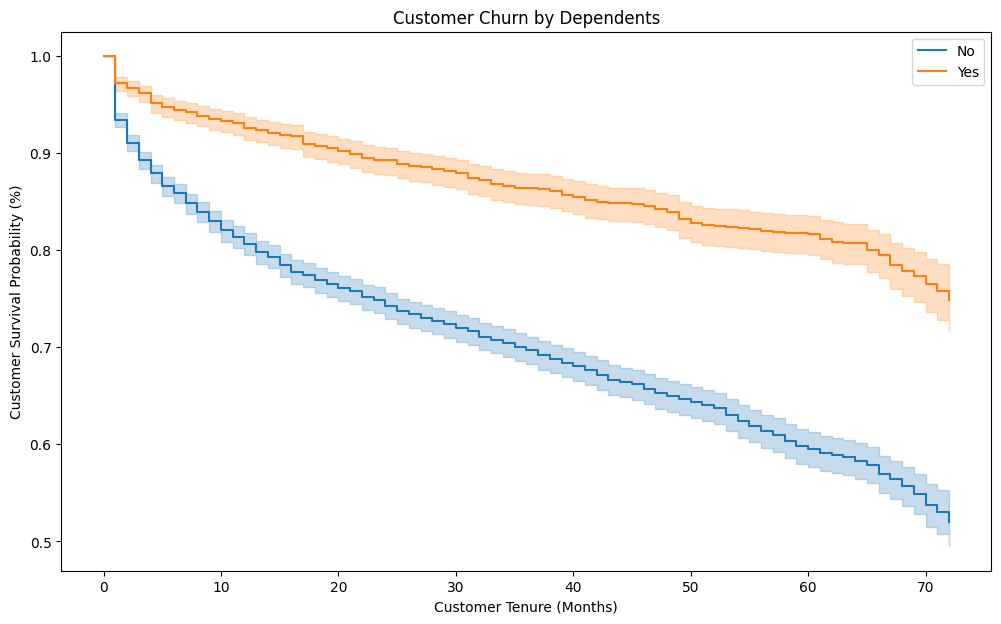

In [ ]:
#Dependents

fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='Dependents', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by Dependents')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Probability (%)')
plt.show()

#Yes = has Dependents
#No = Does not have Dependents

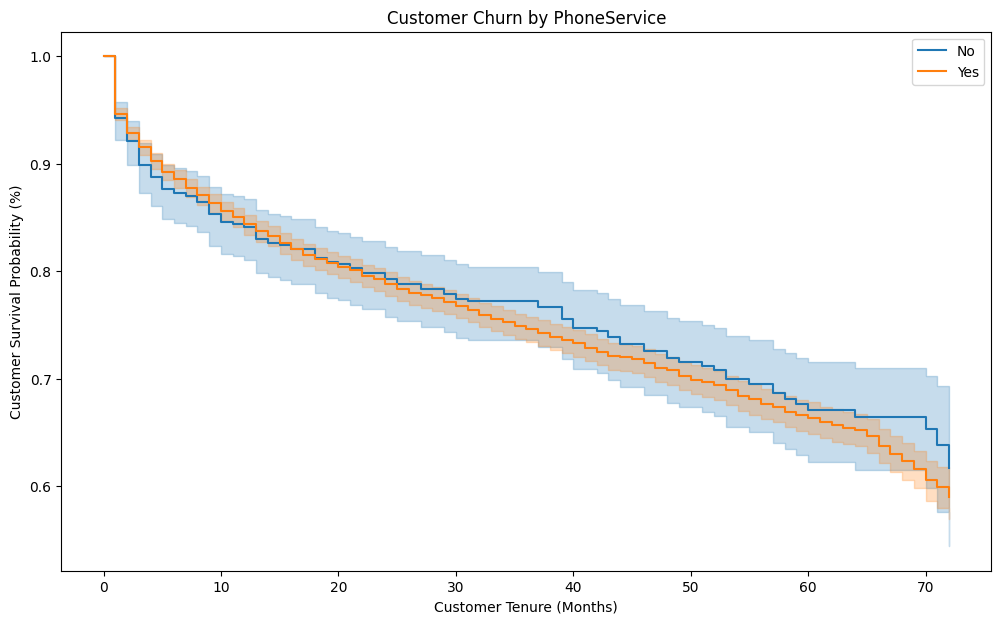

In [ ]:
#PhoneService

fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='PhoneService', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by PhoneService')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Probability (%)')
plt.show()

#Yes = has a PhoneService
#No = Does not have a PhoneService

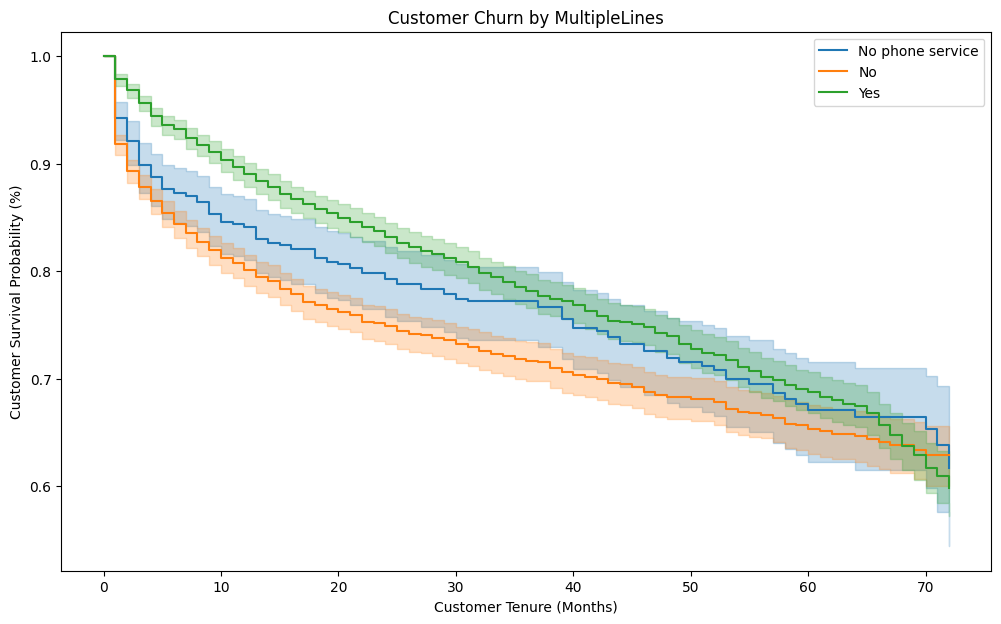

In [ ]:
#MultipleLines

fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='MultipleLines', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by MultipleLines')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Probability (%)')
plt.show()

#Yes = has MultipleLines
#No = Does not have MultipleLines

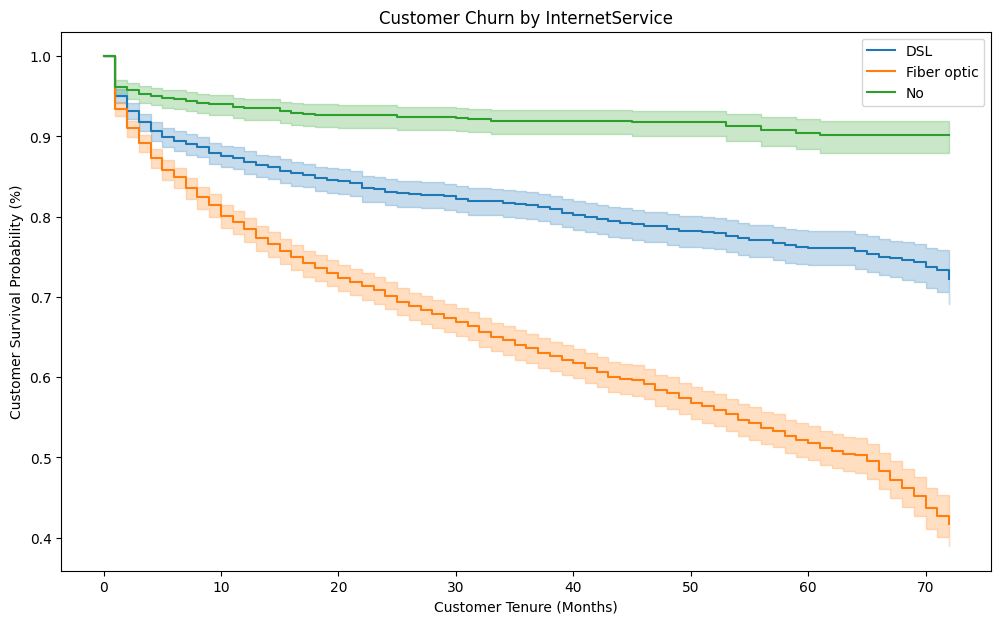

In [ ]:
#InternetService

fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='InternetService', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by InternetService')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Probability (%)')
plt.show()

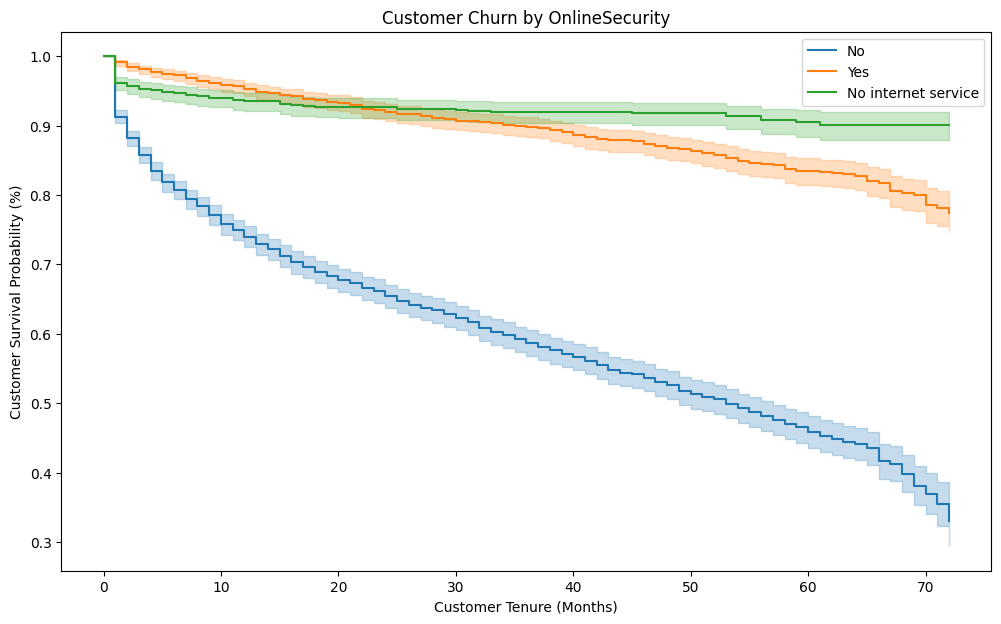

In [ ]:
#OnlineSecurity

fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='OnlineSecurity', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by OnlineSecurity')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Probability (%)')
plt.show()

#Yes = has OnlineSecurity
#No = no OnlineSecurity

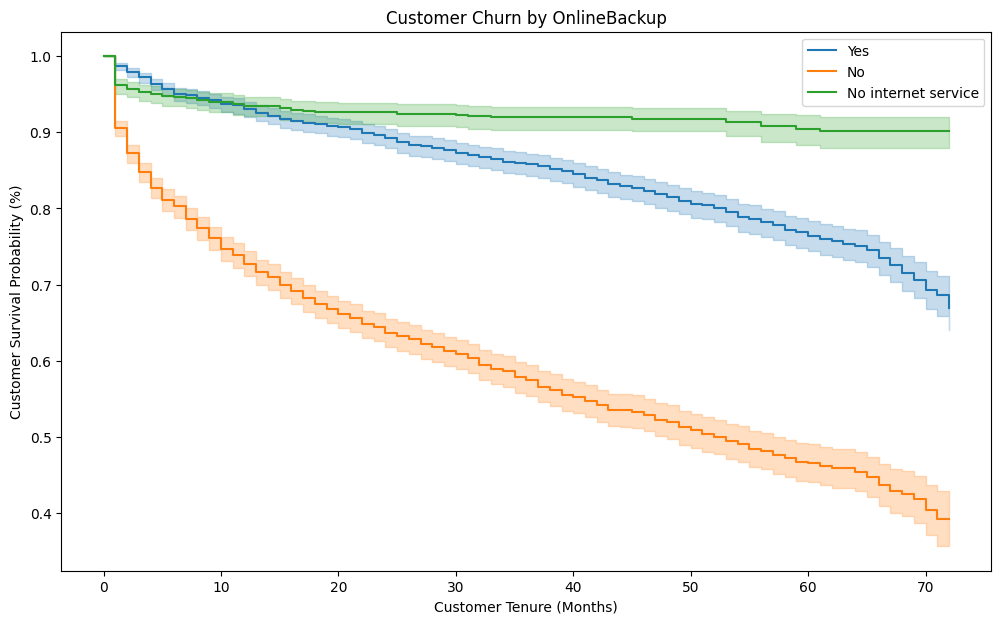

In [ ]:
#OnlineBackup

fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='OnlineBackup', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by OnlineBackup')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Probability (%)')
plt.show()

#Yes = has OnlineBackup
#No = no OnlineBackup

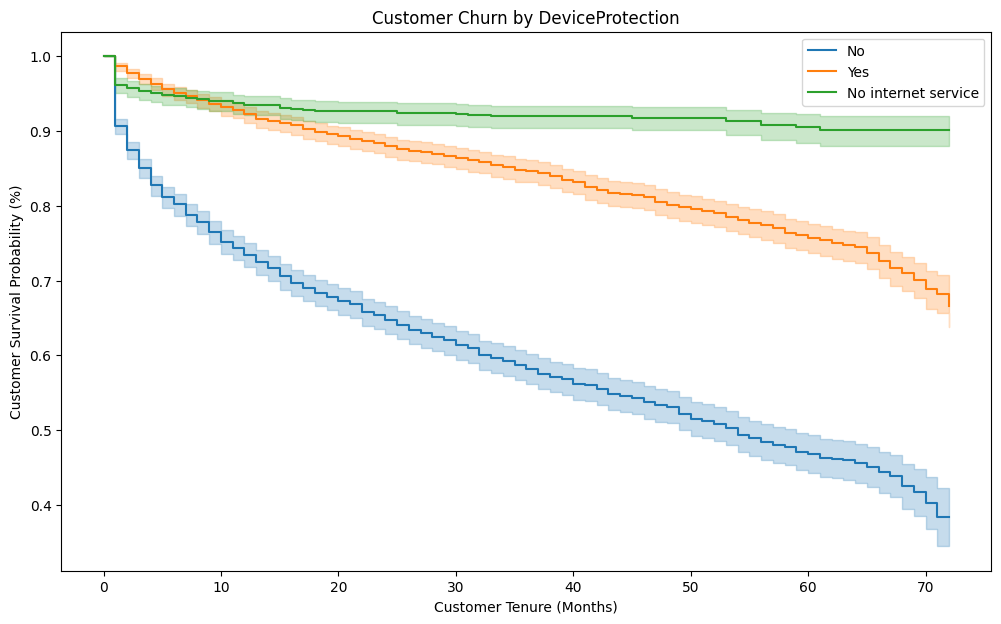

In [ ]:
#DeviceProtection

fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='DeviceProtection', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by DeviceProtection')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Probability (%)')
plt.show()

#Yes = has DeviceProtection
#No = no DeviceProtection

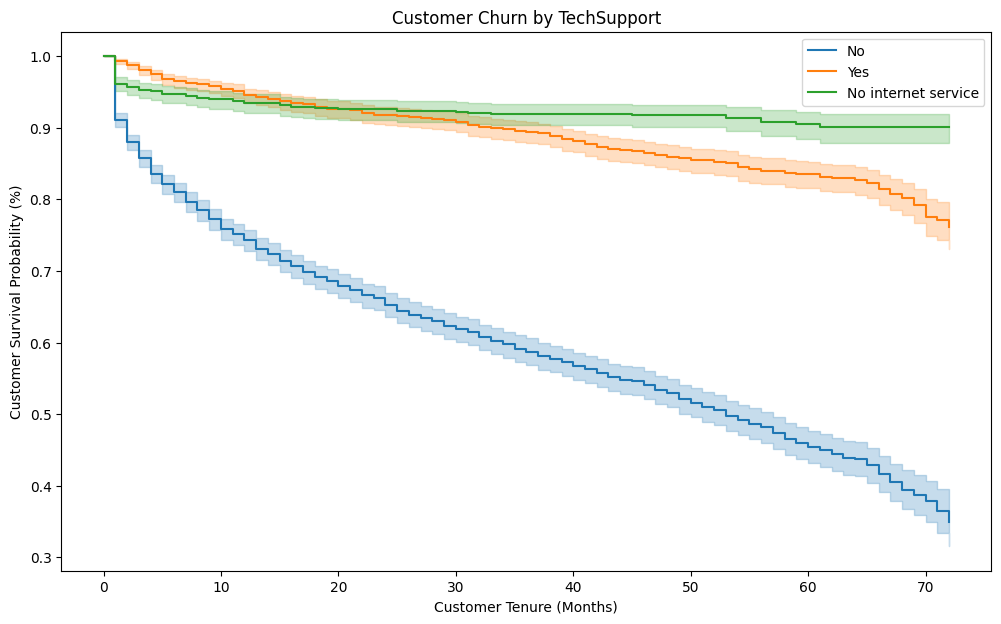

In [ ]:
#TechSupport

fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='TechSupport', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by TechSupport')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Probability (%)')
plt.show()

#Yes = has TechSupport
#No = no TechSupport

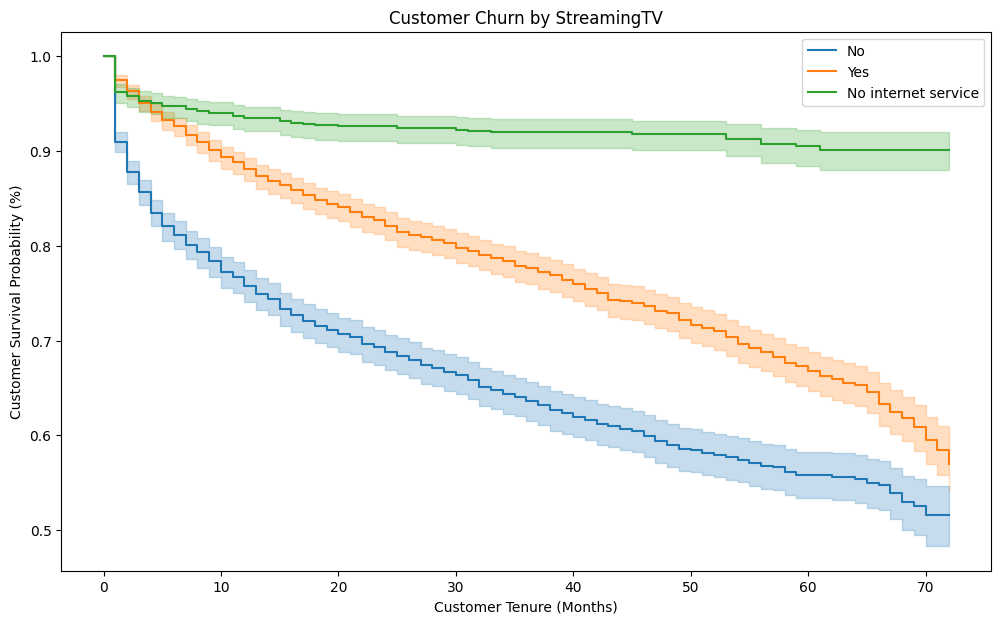

In [ ]:
#StreamingTV

fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='StreamingTV', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by StreamingTV')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Probability (%)')
plt.show()

#Yes = has StreamingTV
#No = no StreamingTV

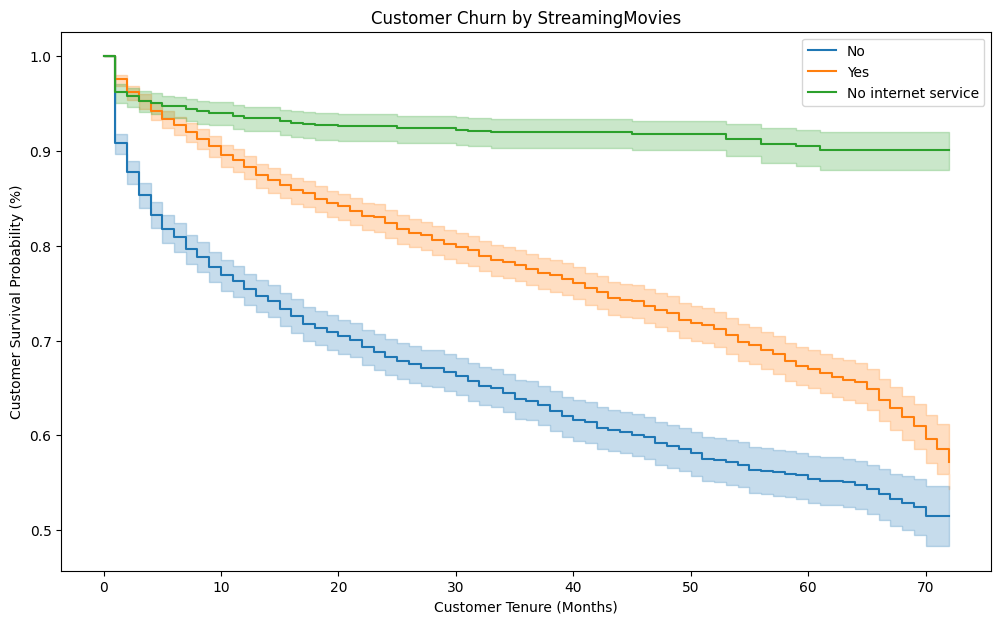

In [ ]:
#StreamingMovies

fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='StreamingMovies', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by StreamingMovies')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Probability (%)')
plt.show()

#Yes = has StreamingMovies
#No = no StreamingMovies

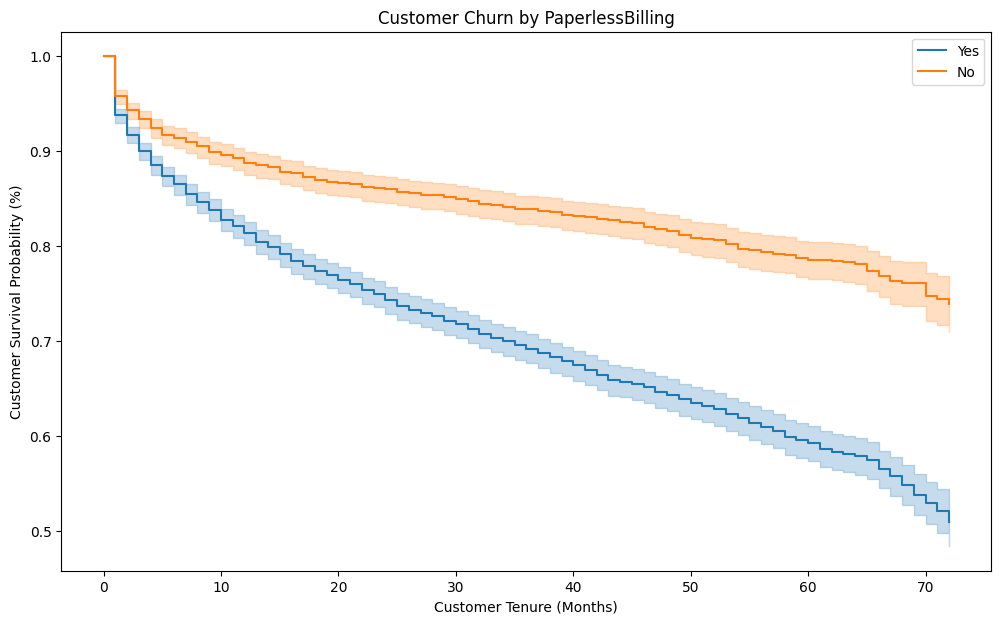

In [ ]:
#PaperlessBilling

fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='PaperlessBilling', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by PaperlessBilling')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Probability (%)')
plt.show()

#Yes = has PaperlessBilling
#No = no PaperlessBilling

In [ ]:
#PaperlessBilling

fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='PaperlessBilling', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by PaperlessBilling')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Probability (%)')
plt.show()

#Yes = has PaperlessBilling
#No = no PaperlessBilling

# Insights
1. Gender: The churn percent is almost equal in case of Male and Females
2. Seniorcitizen: churn rate is higher for senior citizens.
3. Customers with Partners and Dependents have lower churn rate as compared to those who don't have partners & Dependents.
4. Churn rate is much higher in case of Fiber Optic Internet Services.
5. Customers who do not have services like OnlineSecurity, OnlineBackup and TechSupport have more propensity to churn out.
6. A larger percent of Customers with monthly subscription have left when compared to Customers with one or two year contract.
7. Churn percent is higher in case of customers having paperless billing option.
8. Customers who have Electronic Check Payment Method tend to leave the platform more when compared to other options.




# Recommendations
1. Customer Specification:  
The most important feature, by far, is the presence of a 1 or 2 year contract. Customers are .25 and .02, respectively, times as likely to cancel their service if they are under contract. Cancellation fees are a possible underlying cause. As long as these fees do not prohibit new sales, we would recommend continuing to put them into as many contracts as possible.

2. Customer Selection:  
Customers with a partner or dependents are .82 and .91 times as likely to cancel as normal customers. Families and other large households seem to be less likely to change providers. This could be due to higher incomes, less time to consider options, or another combination of factors.


3. Payment Systems:  
Provide Auto Bill Pay option. Can offer other services as part of Auto Bill Payment facility.Make sure your customer's default is an automatic payment made monthly. This requires little effort from the customer to remain subscribed.
Conversely, sending a check, in the mail or electronically, is a time consuming, it requires effort to remain subscribed.

4. Bundled Services
Provide bundled services. Unearth preferred combinations of services and offer as a bundle.
